# **Market Segmentation of Electronic Vehicles in India**


---



## JYOTHSNADEVI Feynn Labs

Dataset Details:


1.   State wise distribution of 2,3,4 wheeler EV s and passenger cars in India
2.   Brands and models of EVs in India with their attributes



# **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **Fetching Datasets**

In [3]:
# fetching dataset - 1
df1 = pd.read_csv('C:/FeynnLabsServices/MARKET-SEGEMENTATION-ON-ELECTRIC-VEHICLE/1.csv')
df1

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381
5,6,Goa,0,0,0,0,0,513,1,514
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [4]:
# fetching dataset - 2
df2 = pd.read_csv('C:/FeynnLabsServices/MARKET-SEGEMENTATION-ON-ELECTRIC-VEHICLE/car.csv')
df2

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
df3 = pd.read_csv('C:/FeynnLabsServices\MARKET-SEGEMENTATION-ON-ELECTRIC-VEHICLE/income.csv')
df3

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


# **Performing Exploratory Data Analysis(EDA)**

# *Data Description and analysis for both datasets*

In [6]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (30, 10)
DF2 Shape:  (103, 15)


In [7]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 >>> ')
print(df1.info())
print('\n <<< DATASET 2 >>>')
print(df2.info())

 <<< DATASET 1 >>> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenge

In [8]:

# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


'<<< DATASET 2 >>>'

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


# **DATASET 1 EDA**

# *Analysis of 2 Wheeler EVs*

## UttarPradesh, Gujrat, Haryana are among the top states with the majority of EV 2W vehicles, while the remaining states have less number .

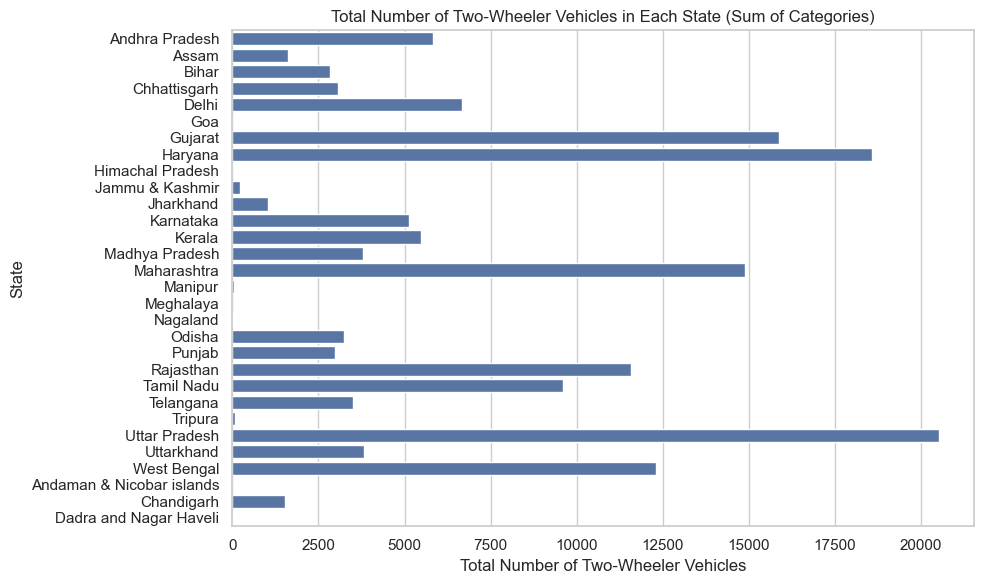

In [9]:
# Sum the three columns to get the total number of two-wheeler vehicles

df1['Total Two Wheelers'] = df1[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                               'Two Wheelers (Category L2 (CMVR))',
                               'Two Wheelers (Max power not exceeding 250 Watts)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Two Wheelers", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Two-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of Two-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# *Analysis of 3 wheeler EV s*

## UttarPradesh, Chattisgarh, Haryana are among the top states with the majority of EV 3W vehicles, while the remaining states have less number .

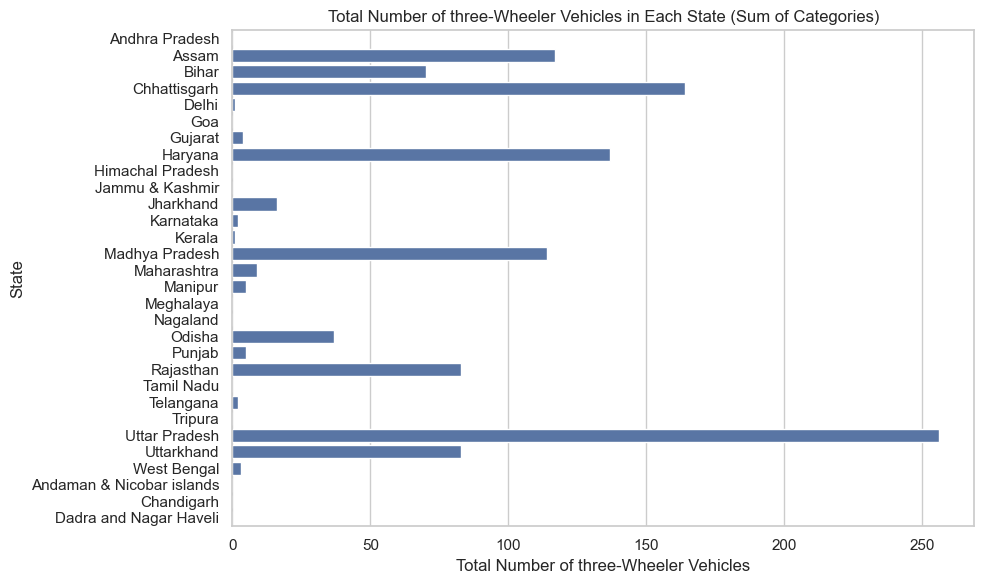

In [10]:
# Sum the three columns to get the total number of two-wheeler vehicles
df1['Total Three Wheelers'] = df1[['Three Wheelers (Category L5 slow speed as per CMVR)',
                               'Three Wheelers (Category L5 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Three Wheelers", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of three-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of three-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# *# Analysis of Buses*

## Delhi, Goa, Maharashtra, Kerela and Karnataka are among the only states with EV buses in India .

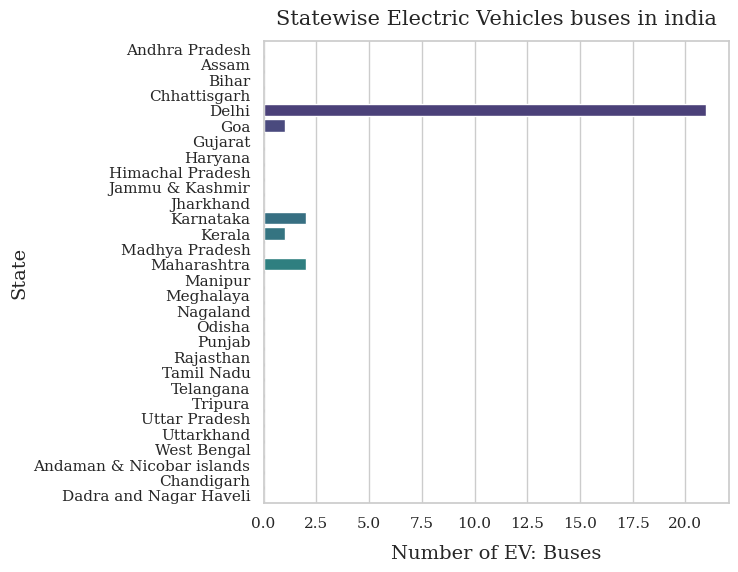

In [11]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Buses', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles buses in india', weight=200, family='serif', size=15, pad=12)
plt.show()


# *Analysis of Passenger Cars*

## Maharashtra, Delhi and Gujrat are among the top states with the majority of EV Passenger cars, while the remaining states have less number .

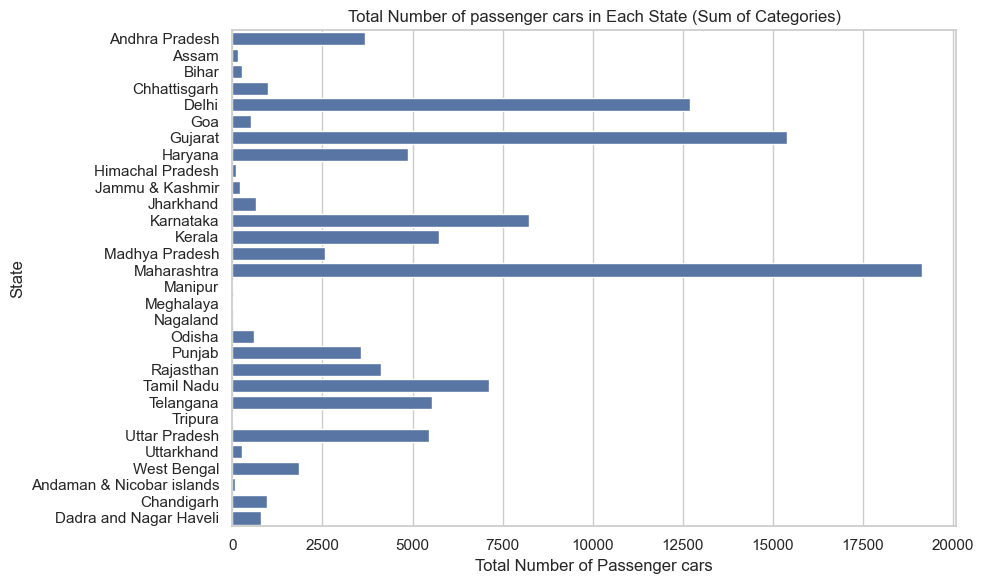

In [12]:
# Sum the three columns to get the total number of two-wheeler vehicles
df1['Total Passenger cars'] = df1[['Passenger Cars (Category M1 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Passenger cars", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Passenger cars")
plt.ylabel("State")
plt.title("Total Number of passenger cars in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# **DATASET 2 EDA**

# *Brand wise EV analysis*

## Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

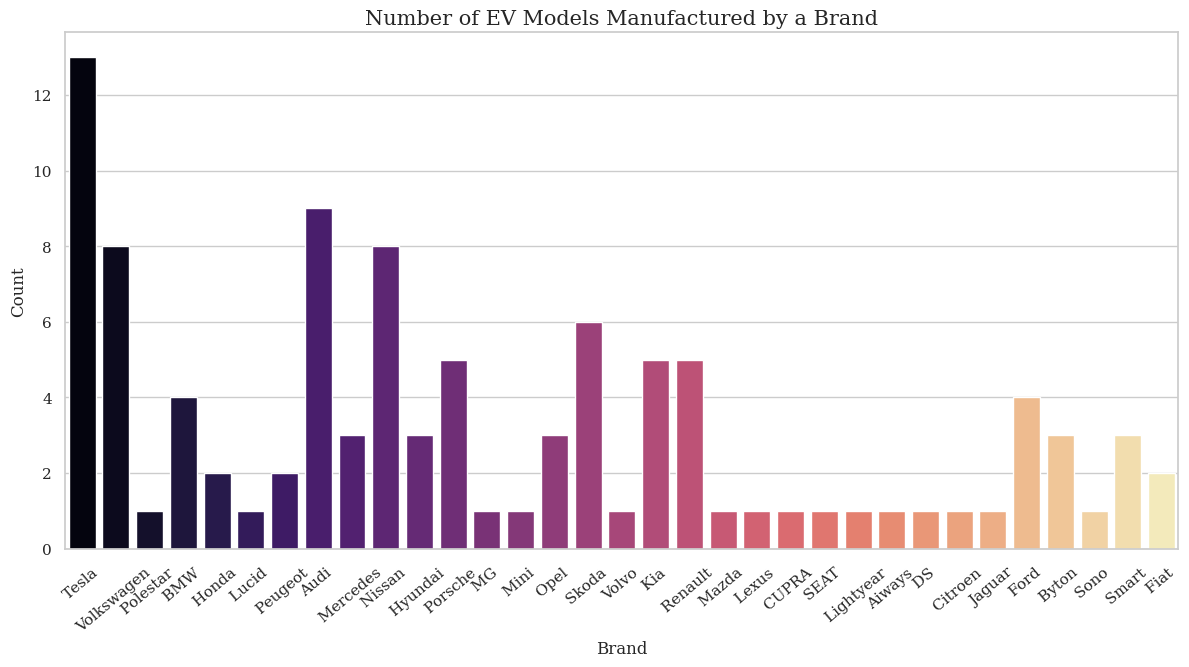

In [13]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count',palette='magma' , height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

# *Anaysis of different body types of EVs*

## SUV and Hatchback body types form the majority while Station and MPV the minority.

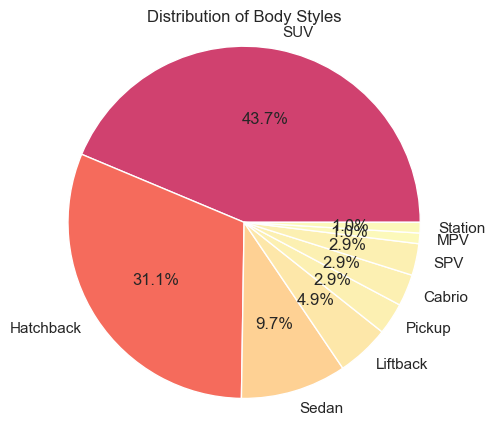

In [14]:
from matplotlib import cm
dataset = df2['BodyStyle'].value_counts()

# Calculate the percentage of each body style
total_count = len(df2)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.magma_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Body Styles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# *Analysis of EVs of different number of seats*

## EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

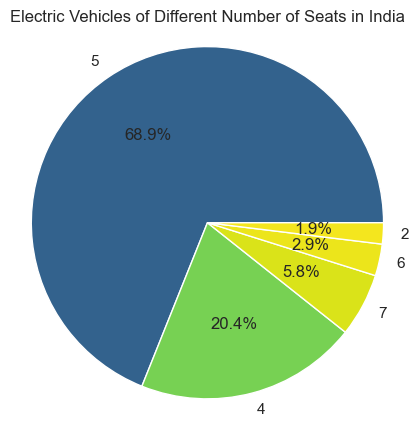

In [15]:
dataset = df2['Seats'].value_counts()

# Calculate the percentage of each body style
total_count = len(df2)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles of Different Number of Seats in India')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# *Analysis of different segments of EVs*

## B and C body segments form the majority while S and A the minority.

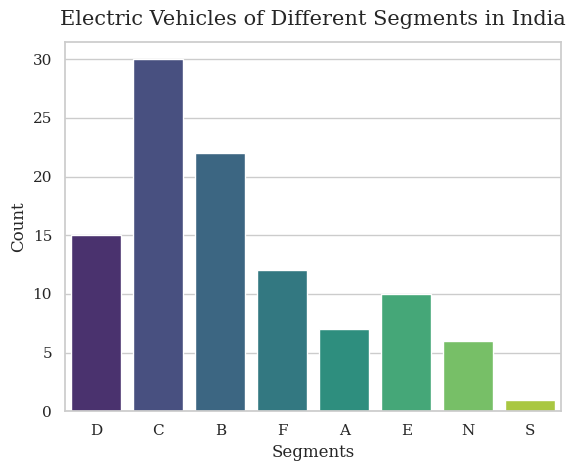

In [16]:
# EVs of different number of seats from dataset 2
sns.countplot(data=df2, x='Segment', palette='viridis')
plt.xlabel('Segments', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=12)
plt.show()

# *Analysis of EV bodystyle vs EV power train*

### For RWD and FWD power train of EVs, the most common body style is Hatch back and the least common one is MPV.
### For AWD, the most common body style is SUV and the least common one is MPV.

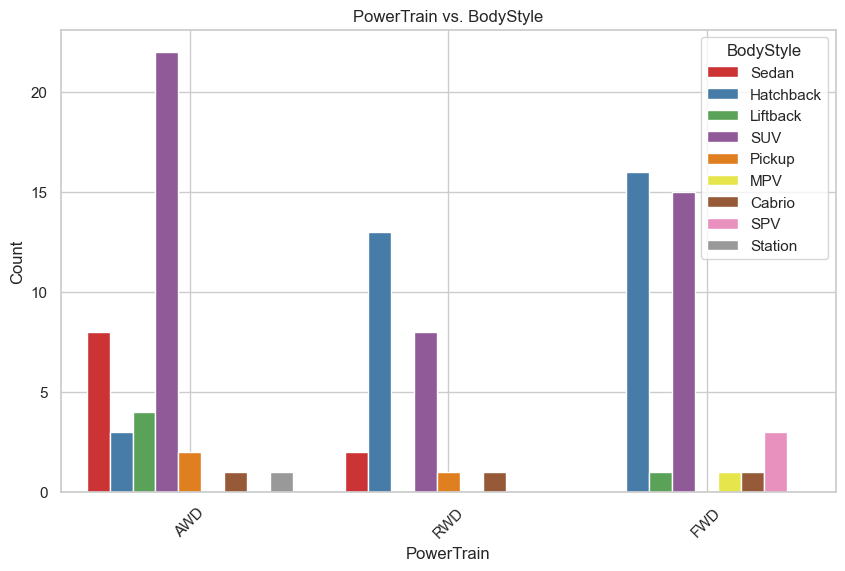

In [17]:
# Categorical plot: PowerTrain vs. BodyStyle
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set1")
sns.countplot(data=df2, x='PowerTrain', hue='BodyStyle', palette=custom_palette)
plt.title('PowerTrain vs. BodyStyle')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.legend(title='BodyStyle', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# *Analysis of different plug types*

## EVs with plus type of 'Type 2 CCS' dominate the market.


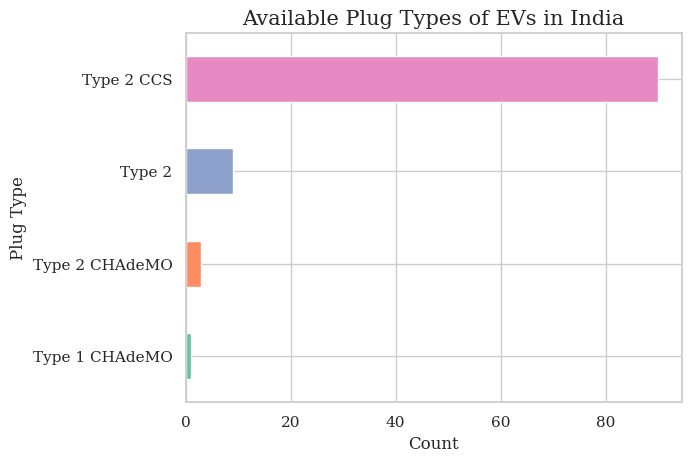

In [18]:
# plug types visualization from dataset
custom_palette = sns.color_palette("Set2")
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh(color=custom_palette)
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

# *Analysis of Plug type used in every Segment*

## Across all segments Type 2 ccs is the most widely used C type.

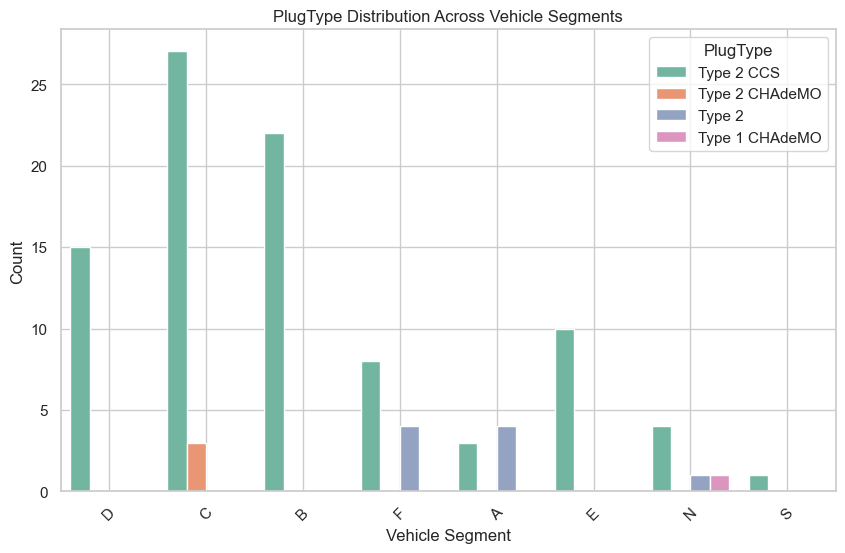

In [19]:
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set2")

sns.countplot(data=df2, x='Segment', hue='PlugType', palette=custom_palette)
plt.title('PlugType Distribution Across Vehicle Segments')
plt.xlabel('Vehicle Segment')
plt.ylabel('Count')
plt.legend(title='PlugType', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# *Price Disitribution of EV s*

Text(0.5, 1.0, 'Price Comparison')

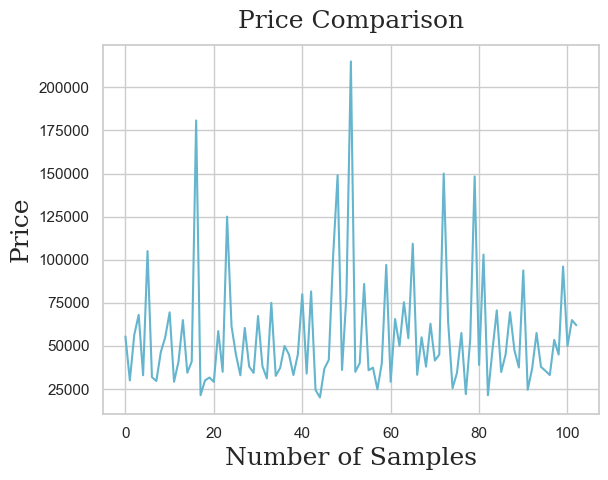

In [20]:
# plotting the price from dataset 2
plt.plot(df2['PriceEuro'], color='c')
plt.xlabel('Number of Samples', family='serif', size=18)
plt.ylabel('Price', family='serif', size=18)
plt.title('Price Comparison', family='serif', size=18, pad=12)

# *Average price Range of EV s*

Text(0.5, 1.0, 'Price Distribution')

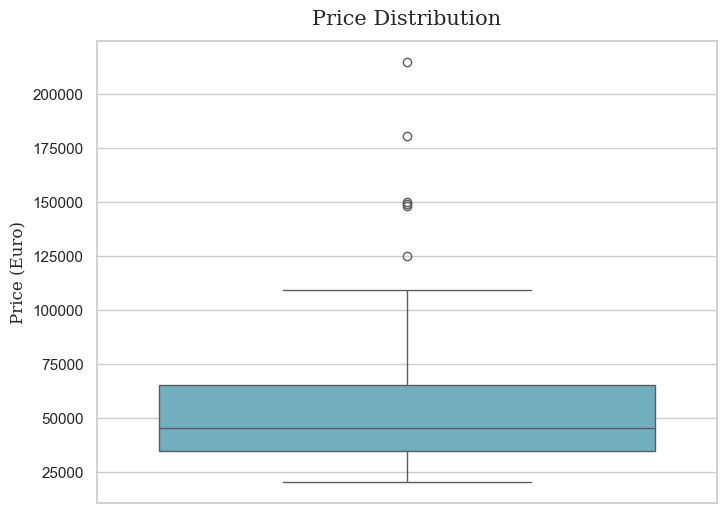

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y='PriceEuro', color='c')
plt.ylabel('Price (Euro)', family='serif', size=12)
plt.title('Price Distribution', family='serif', size=15, pad=12)

# *Analysis of Price for different EV Segments*

## The price of EV s in Segment E can go upto 185000 Euros nd that of Segment S can go upto 300000 Euros

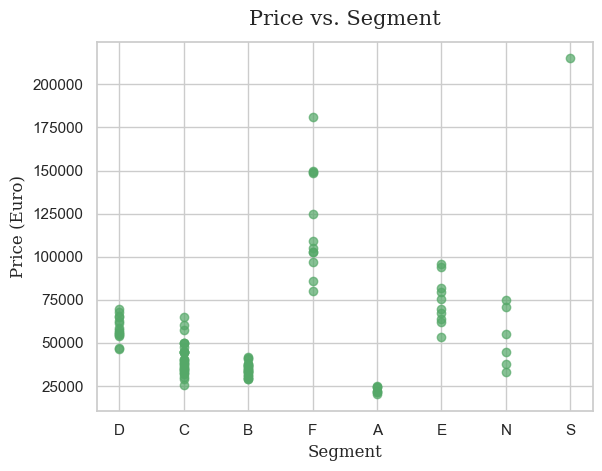

In [22]:
plt.scatter(df2['Segment'], df2['PriceEuro'], color='g', alpha=0.7)
plt.xlabel('Segment', family='serif', size=12)
plt.ylabel('Price (Euro)', family='serif', size=12)
plt.title('Price vs. Segment', family='serif', size=15, pad=12)
plt.grid(True)

# *Conversion of object data type to float datatype for further analysis*

In [23]:
df2['TopSpeed_KmH'] = df2['TopSpeed_KmH'].astype(str)
df2['TopSpeed_KmH'] = df2['TopSpeed_KmH'].str.replace(' km/h', '').astype(float)

#df2['TopSpeed'] = df2['TopSpeed'].str.split(' ').str[0].astype(float)
df2['Efficiency_WhKm'] = df2['Efficiency_WhKm'].astype(str)
df2['Efficiency_WhKm'] = df2['Efficiency_WhKm'].str.split(' ').str[0].astype(float)

df2['FastCharge_KmH'] = df2['FastCharge_KmH'].replace('-', '0')
df2['FastCharge_KmH'] = df2['FastCharge_KmH'].astype(str)
df2['FastCharge_KmH'] = df2['FastCharge_KmH'].str.replace(' km/h', '').astype(float)
#df2['FastCharge'] = df2['FastCharge'].str.replace('-', '').astype(float)

df2['AccelSec'] = df2['AccelSec'].astype(str)
df2['AccelSec'] = df2['AccelSec'].str.replace(' sec', '').astype(float)

df2['Range_Km'] = df2['Range_Km'].astype(str)
df2['Range_Km'] = df2['Range_Km'].str.split(' ').str[0].astype(float)
df2

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210.0,400.0,181.0,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145.0,170.0,168.0,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# *Analysis of EVs based on accleration*

## Renault, Seat and Smart have the most Acceleration and are the top performers while Tesla, Lucid and Porsche have the lowest accelration.

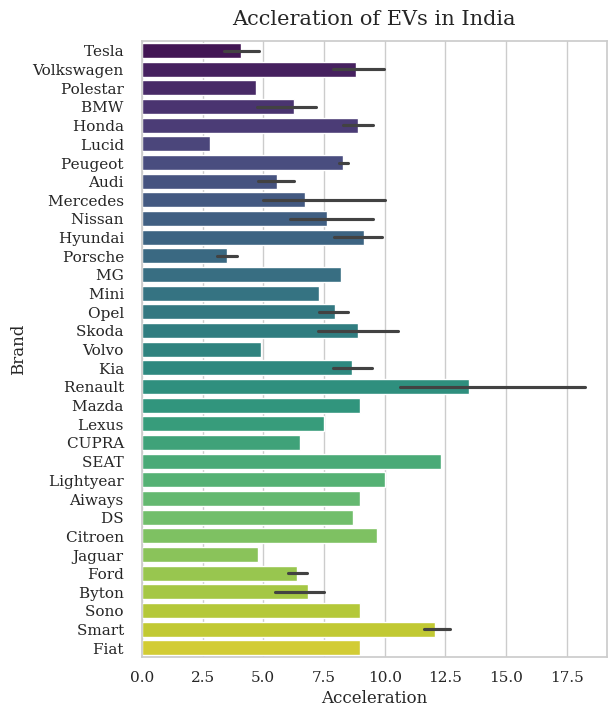

In [24]:
# accleration visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='AccelSec', palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Acceleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

# *CORRELATION MATRIX*

Unnamed: 0           int64
Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH       float64
Range_Km           float64
Efficiency_WhKm    float64
FastCharge_KmH     float64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object


Text(0.5, 1.0, 'Correlation Matrix')

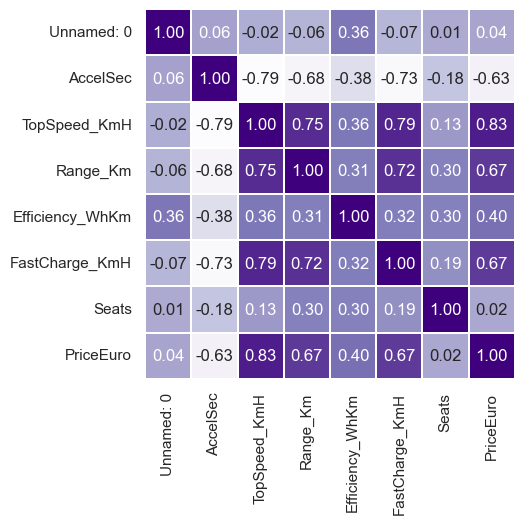

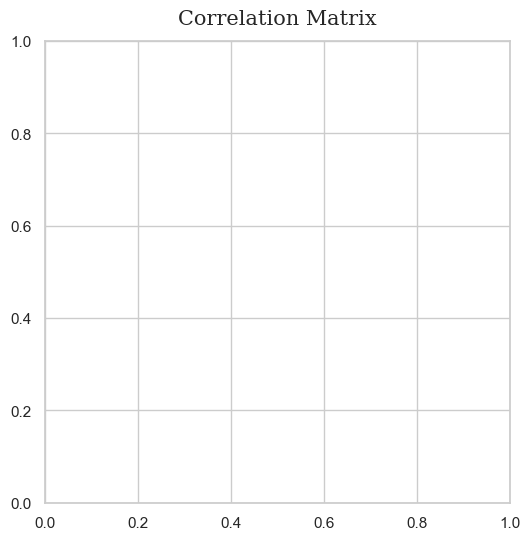

In [25]:
import numpy as np
# Check the data types of the columns
print(df2.dtypes)

# Optionally convert columns to numeric, coercing errors
df2_numeric = df2.select_dtypes(include=[np.number])  # Keep only numeric columns

# Create the correlation matrix
sns.heatmap(data=df2_numeric.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.figure(figsize=(6,6))
plt.title('Correlation Matrix', family='serif', size=15, pad=12)

# *Analysis of EVs based on the range parameter*

## Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.


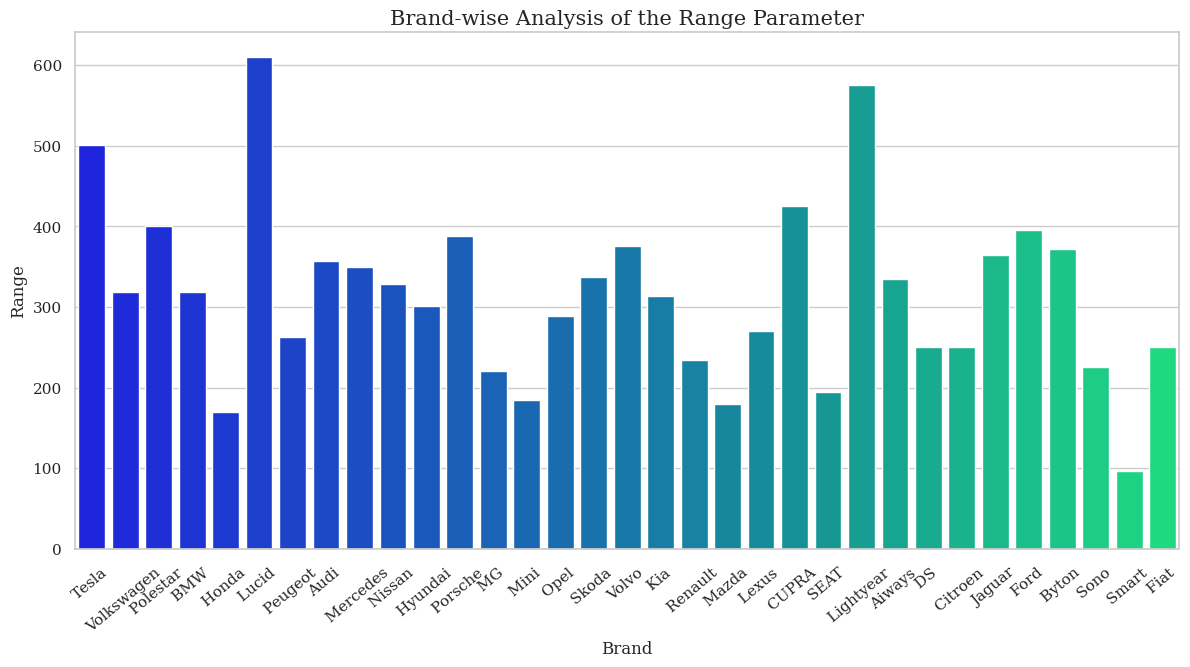

In [26]:
# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='winter', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);


# **DATASET 3 EDA**

# *Age wise EV analysis*

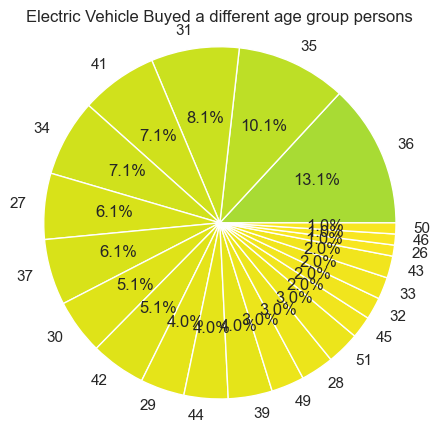

In [27]:
dataset = df3['Age'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicle Buyed a different age group persons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the salary*

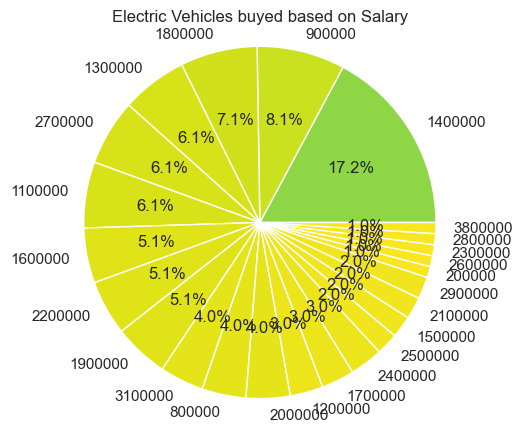

In [28]:
dataset = df3['Salary'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on Salary')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the profession*

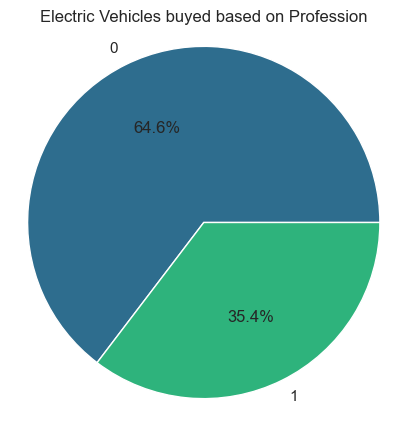

In [72]:
dataset = df3['Profession'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on Profession')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Maritul Status*

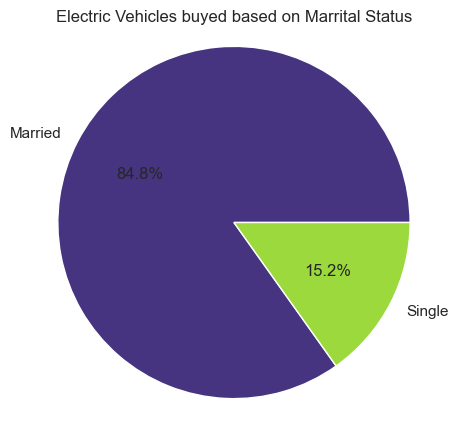

In [73]:
dataset = df3['Marrital Status'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on Marrital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Education*

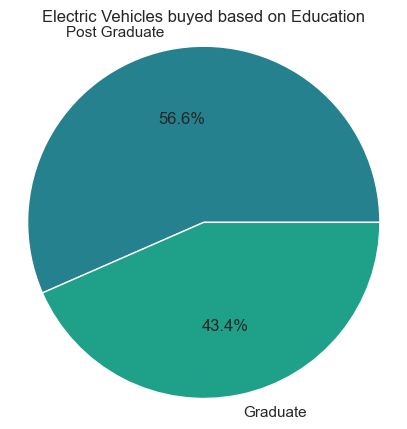

In [74]:
dataset = df3['Education'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on Education')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the No of Dependents*

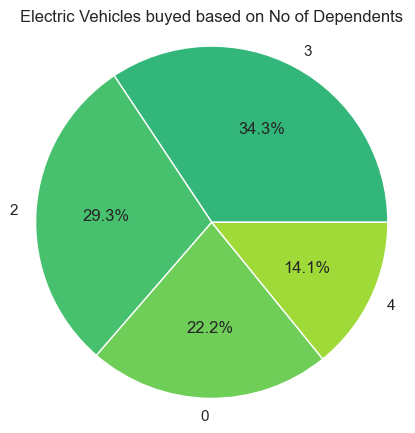

In [75]:
dataset = df3['No of Dependents'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Dependents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Personal loan*

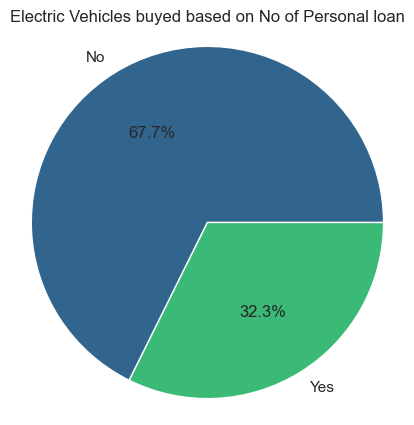

In [76]:
dataset = df3['Personal loan'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Personal loan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the House loan*

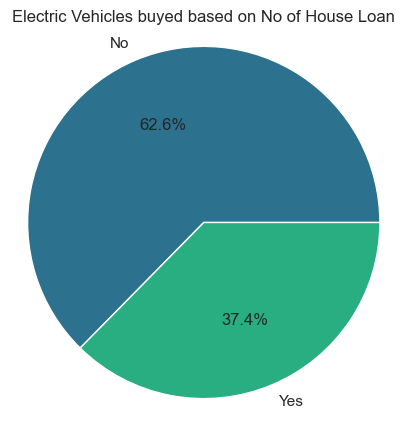

In [77]:
dataset = df3['House Loan'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of House Loan')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Wife Working*

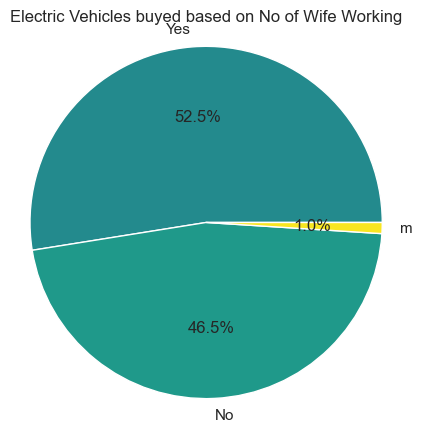

In [78]:
dataset = df3['Wife Working'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Wife Working')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Wife salary*

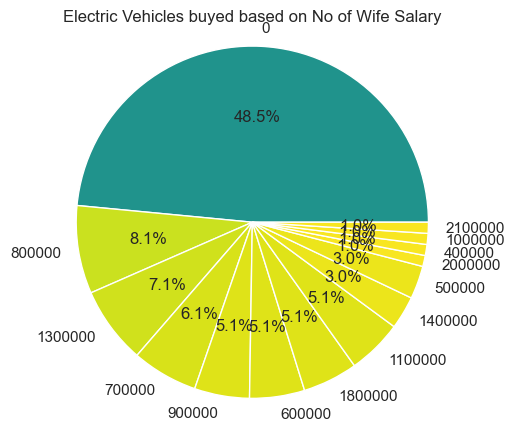

In [79]:
dataset = df3['Wife Salary'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Wife Salary')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Total salary*

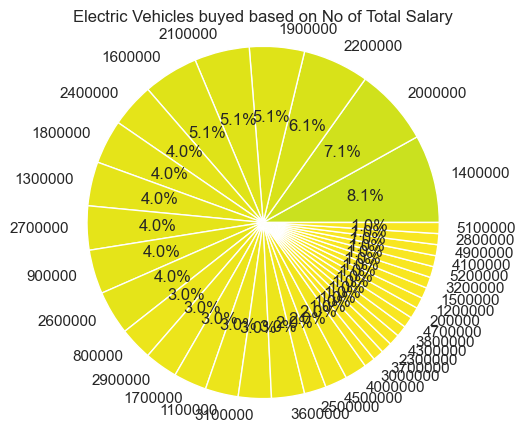

In [80]:
dataset = df3['Total Salary'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Total Salary')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Make*

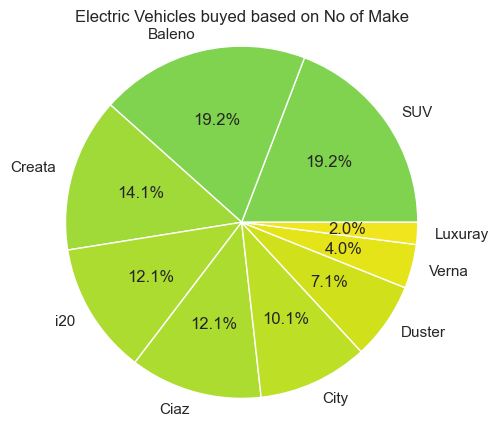

In [81]:
dataset = df3['Make'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Make')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# *Analysis of EVs based on the Price*

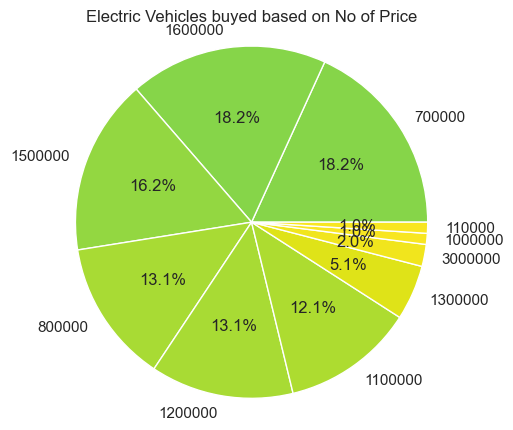

In [82]:
dataset = df3['Price'].value_counts()

# Calculate the percentage of each body style
total_count = len(df3)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles buyed based on No of Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Market Segmentation

---



# *Model Building Using K-Means Clusteing*

In [29]:
# encoding the categorical features

# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['RapidCharge'].replace(to_replace=['Rapid charging possible','Rapid charging not possible'],value=[0, 1],inplace=True)

# Profession
df3['Profession'].replace(to_replace=['Salaried','Business'],value=[0, 1],inplace=True)

In [30]:
# selecting features for building a model
X = df2[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

##  Segmentation on Acceleration

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df2 is your DataFrame
# First, identify non-numeric columns
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# If you want to encode these columns
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))  # Convert to string if necessary

# Now, create your feature set (X)
# Make sure to drop the target column if it exists
# Replace 'target_column' with your actual target column name if applicable
X = df2.drop(columns=['AccelSec'], errors='ignore')  # Use errors='ignore' to avoid errors if the column doesn't exist

# Now scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you should be able to work with X_scaled without errors


Non-numeric columns: Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')


##  Segmentation on TopSpeed

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['TopSpeed_KmH'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Range

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['Range_Km'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Efficiency

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['Efficiency_WhKm'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on FastCharge

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['FastCharge_KmH'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on RapidCharge

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['RapidCharge'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on PowerTrain

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['PowerTrain'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on PlugType

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['PlugType'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Segment

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['Segment'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Seats

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['Seats'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on PriceEuro

In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
X = df2.drop(columns=['PriceEuro'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


In [33]:
df2.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,30,46,4.6,233.0,450.0,161.0,940.0,1,0,2,7,3,5,55480
1,1,31,33,10.0,160.0,270.0,167.0,250.0,0,2,2,1,2,5,30000
2,2,23,0,4.7,210.0,400.0,181.0,620.0,1,0,2,2,3,5,56440
3,3,2,101,6.8,180.0,360.0,206.0,560.0,1,2,2,6,3,5,68040
4,4,9,78,9.5,145.0,170.0,168.0,190.0,1,2,2,1,1,4,32997


In [34]:
print(X_scaled.shape)
n_components = min(X_scaled.shape)  # Choose a suitable number
pca = PCA(n_components=n_components)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your original data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of your scaled data
print(X_scaled.shape)  # Output: (num_samples, num_features)

# Adjust n_components
n_components = min(X_scaled.shape)  # Choose the minimum of samples and features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df2_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(df2_pca.head())


(103, 14)
(103, 14)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.213512  1.659701 -1.930079  0.206239 -1.188311 -0.207662 -1.246565   
1 -2.400371  1.412039 -0.336278 -0.400654 -1.351300 -1.675743  0.507466   
2  0.933278  2.142636 -0.865962  0.541515  0.173468 -0.322149 -0.785503   
3  0.520986 -1.757292 -1.790017 -0.112334 -0.989431  0.212903  1.429031   
4 -2.953741 -0.531867 -1.662855 -0.514735 -0.109269  0.864158  0.789034   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0  0.809912  0.343343 -0.124596  0.905730 -0.494575 -0.196646 -0.344210  
1 -0.537978 -0.573867  0.193532 -0.521606  0.016970  0.503789 -0.065859  
2 -0.802496 -1.034506 -0.422402  0.513746 -0.502878  0.309351 -0.097080  
3  0.719793 -1.102106  0.034599  0.511984 -0.042106  0.145803  0.428276  
4 -0.341070 -1.174871  0.386262  0.128165 -0.131883  0.424837 -0.008231  


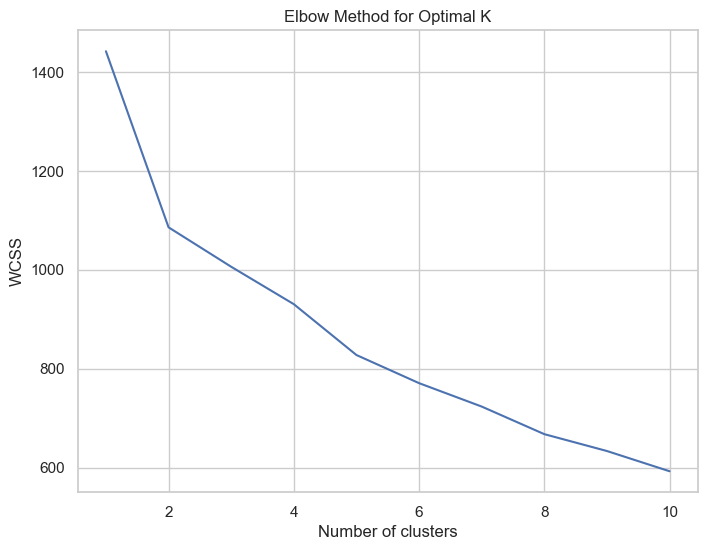

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your original data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = min(X_scaled.shape)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df2_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = min(10, len(df2_pca))  # Ensure max_clusters does not exceed number of samples
for i in range(1, max_clusters + 1):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
df2_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = min(10, len(df2_pca))  # Ensure max_clusters does not exceed number of samples
for i in range(1, max_clusters + 1):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)
print(len(wcss))

10


In [37]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    26
5    22
2    14
7    10
3     8
1     7
6     6
8     4
4     4
9     2
Name: count, dtype: int64

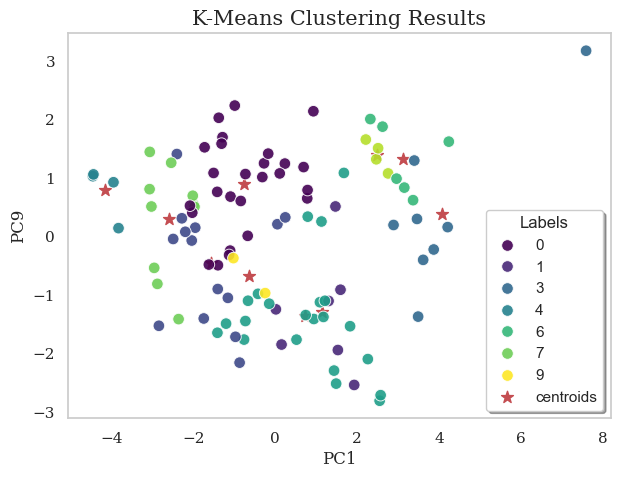

In [45]:
import seaborn as sns
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

# *Cluster summary for type of EV s and their properties*

In [39]:
print(df2.columns)
from sklearn.cluster import KMeans
X = df2.drop(columns=['target_column'], errors='ignore')  # Replace as necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)  # Change number of clusters as needed
df2['clusters'] = kmeans.fit_predict(X_scaled)
kmeans = KMeans(n_clusters=3)  # Set the number of clusters as needed
df2['clusters'] = kmeans.fit_predict(X_scaled)
cluster_summary = df2.groupby('clusters').agg({
    'AccelSec': 'median',        # You can use 'median' instead of 'mean' if preferred
    'TopSpeed_KmH': 'median',
    'Range_Km': 'median',
    'Efficiency_WhKm': 'median',
    'FastCharge_KmH':'median',
    'RapidCharge':'median',
    'PowerTrain':'median',
    'PlugType':'median',
    'BodyStyle':'median',
    'Segment':'median',
    'Seats': 'median',
    'PriceEuro': 'median'
})
print(cluster_summary)

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')
          AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
clusters                                                                      
0             2.10         410.0     970.0            206.0           920.0   
1             8.75         150.0     255.0            171.0           270.0   
2             5.00         200.0     400.0            206.5           545.0   

          RapidCharge  PowerTrain  PlugType  BodyStyle  Segment  Seats  \
clusters                                                                 
0                 1.0         0.0       2.0        0.0      7.0    4.0   
1                 1.0         1.0       2.0        1.0      1.5    5.0   
2                 1.0         0.0       2.0        6.0      4.0    5

# *Profiles for each cluster and EV s belonging to that cluster*

In [40]:
cluster_profiles = {}

# Iterate through each cluster label
for cluster_label in df2['clusters'].unique():
    # Filter the data for the current cluster
    cluster_data = df2[df2['clusters'] == cluster_label]

    # Create a profile for the cluster
    profile = {
        'clusters': cluster_label,
        'Number of EVs': len(cluster_data),
        'Brands': cluster_data['Brand'].unique().tolist(),
        'Models': cluster_data['Model'].unique().tolist(),
        
        'PowerTrain Types': cluster_data['PowerTrain'].unique().tolist(),
        'Plug Types': cluster_data['PlugType'].unique().tolist(),
        'Body Styles': cluster_data['BodyStyle'].unique().tolist(),
        'Seats Range': f"{cluster_data['Seats'].min()}-{cluster_data['Seats'].max()}",
        'Price Range (Euro)': f"{cluster_data['PriceEuro'].min()}-{cluster_data['PriceEuro'].max()}",
        # Add more relevant information here based on your dataset
    }

    # Store the cluster profile in the dictionary
    cluster_profiles[cluster_label] = profile

# Display the cluster profiles
for cluster_label, profile in cluster_profiles.items():
    print(f"Cluster {cluster_label} Profile:")
    for key, value in profile.items():
        print(f"{key}: {value}")
    print("\n")

Cluster 2 Profile:
clusters: 2
Number of EVs: 44
Brands: [30, 23, 2, 15, 1, 18, 24, 32, 14, 11, 8, 27, 3, 20]
Models: [46, 0, 101, 4, 62, 21, 100, 69, 53, 92, 47, 73, 90, 16, 20, 49, 96, 65, 60, 91, 51, 50, 54, 28, 66, 14, 56, 26, 67, 43, 61, 58, 68, 52, 22, 15, 95, 27, 93, 9, 94, 8, 10, 42]
PowerTrain Types: [0, 2, 1]
Plug Types: [2, 1]
Body Styles: [7, 2, 6, 4, 8, 5, 1]
Seats Range: 4-7
Price Range (Euro): 45000-180781


Cluster 1 Profile:
clusters: 1
Number of EVs: 58
Brands: [31, 9, 22, 30, 20, 10, 16, 19, 21, 27, 2, 12, 25, 17, 13, 4, 26, 0, 6, 5, 8, 29, 28, 7, 3]
Models: [33, 78, 83, 81, 48, 39, 38, 35, 32, 89, 74, 12, 13, 23, 34, 30, 98, 80, 86, 76, 44, 40, 72, 97, 77, 37, 11, 45, 88, 5, 71, 55, 25, 79, 1, 70, 82, 75, 7, 57, 84, 36, 99, 64, 85, 17, 29, 19, 59, 3, 24, 18, 2, 31, 87, 41, 6]
PowerTrain Types: [2, 1]
Plug Types: [2, 3, 1, 0]
Body Styles: [1, 7, 6, 2, 3, 5, 0]
Seats Range: 2-7
Price Range (Euro): 20129-54475


Cluster 0 Profile:
clusters: 0
Number of EVs: 1
Brands: [

# MARKET SEGEMENTATION ON INCOME DATASET



In [46]:
#  selecting features for building a model
X1 = df3[['Age','Profession','Marrital Status','Education','No of Dependents','Personal loan','House Loan','Wife Working','Salary','Wife Salary','Total Salary','Make','Price']]

##  Segmentation on Salary

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Salary'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Age

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Age'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Profession

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Profession'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Marrital Status

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Marrital Status'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Education

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Education'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on No of Dependents

In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['No of Dependents'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Personal Loan

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Personal loan'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on House Loan

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['House Loan'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Wife Working

In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Wife Working'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Wife Salary

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Wife Salary'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Total Salary

In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Total Salary'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Make

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Make'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


##  Segmentation on Price

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
non_numeric_cols = df2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
for col in non_numeric_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
X1 = df3.drop(columns=['Price'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Non-numeric columns: Index([], dtype='object')


In [48]:
print(X_scaled.shape)
n_components = min(X_scaled.shape)  # Choose a suitable number
pca = PCA(n_components=n_components)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your original data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of your scaled data
print(X_scaled.shape)  # Output: (num_samples, num_features)

# Adjust n_components
n_components = min(X_scaled.shape)  # Choose the minimum of samples and features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df3_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(df3_pca.head())


(103, 15)
(103, 15)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.454103  1.895936  1.460282  0.270682 -1.376542 -0.234124 -1.282135   
1 -2.546059  1.448793  0.078215 -0.368703 -1.317600 -1.711943  0.554607   
2  1.227916  2.278632  0.551825  0.550376  0.131603 -0.302399 -0.735841   
3  0.580249 -1.478084  1.935586 -0.061438 -1.152335  0.209359  1.405179   
4 -2.977599 -0.205503  1.818396 -0.490669 -0.251732  0.885543  0.807150   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.752426  0.239042 -0.108341 -0.048818  1.047060  0.080429  0.386792   
1 -0.557414 -0.540712  0.173403 -0.027970 -0.557802 -0.426259  0.175868   
2 -0.865004 -0.844752 -0.494435 -0.711699  0.413679 -0.457684  0.160181   
3  0.752989 -0.989375 -0.031924 -0.644858  0.250886  0.019363 -0.147058   
4 -0.322628 -0.980591  0.308625 -0.699174 -0.099227 -0.351200  0.141653   

       PC15  
0  0.058552  
1 -0.063119  
2 -0.002181  
3 -0.468033  
4 -0.110

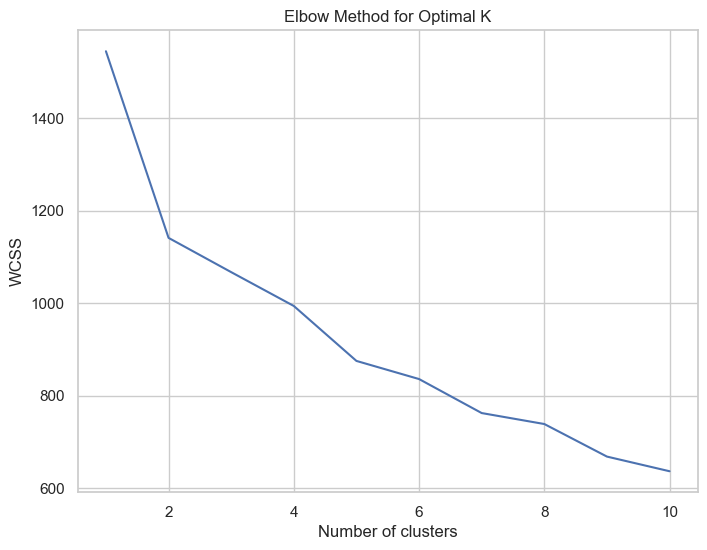

In [55]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your original data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = min(X_scaled.shape)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df3_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = min(10, len(df3_pca))  # Ensure max_clusters does not exceed number of samples
for i in range(1, max_clusters + 1):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

9    17
4    14
1    14
3    13
2    11
7     9
6     8
5     8
0     7
8     2
Name: count, dtype: int64

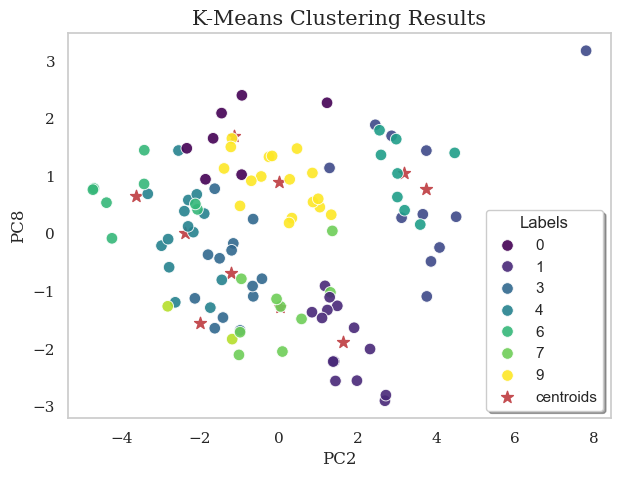

In [71]:
import seaborn as sns
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df3_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC2', family='serif', size=12)
plt.ylabel('PC8', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()